In [3]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

In [4]:
print(AND(0, 0)) # 输出0
print(AND(1, 0)) # 输出0
print(AND(0, 1)) # 输出0
print(AND(1, 1)) # 输出1

0
0
0
1


In [5]:
import numpy as np
x = np.array([0, 1])
w = np.array([0.5, 0.5])
b = -0.7
print(w*x)
print(np.sum(w*x))
print(np.sum(w*x) + b)

[0.  0.5]
0.5
-0.19999999999999996


In [6]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1
    
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1
    
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5]) # 仅权重和偏置与AND不同！
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1
    
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

In [7]:
print(XOR(0, 0)) # 输出0
print(XOR(1, 0)) # 输出1
print(XOR(0, 1)) # 输出1
print(XOR(1, 1)) # 输出0

0
1
1
0


## Chapter 3

In [8]:
def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [9]:
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [10]:
y = x > 0
y

array([False,  True,  True])

In [11]:
y = y.astype(int)
y

array([0, 1, 1])

### 　阶跃函数的图形

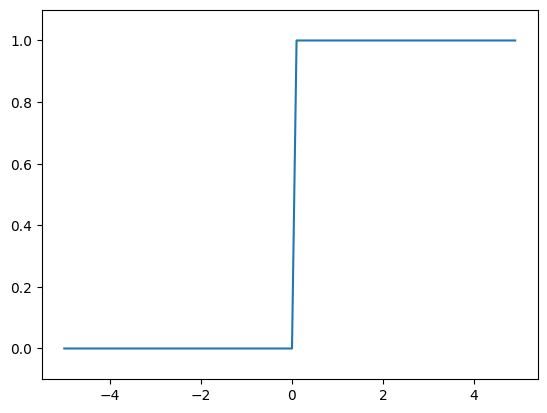

In [12]:
import numpy as np
import matplotlib.pylab as plt
def step_function(x):
    return np.array(x > 0, dtype=int)
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # 指定y轴的范围
plt.show()

### sigmoid函数的实现

In [13]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [14]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

In [15]:
t = np.array([1.0, 2.0, 3.0])
1.0 + t

array([2., 3., 4.])

In [16]:
1.0 / t

array([1.        , 0.5       , 0.33333333])

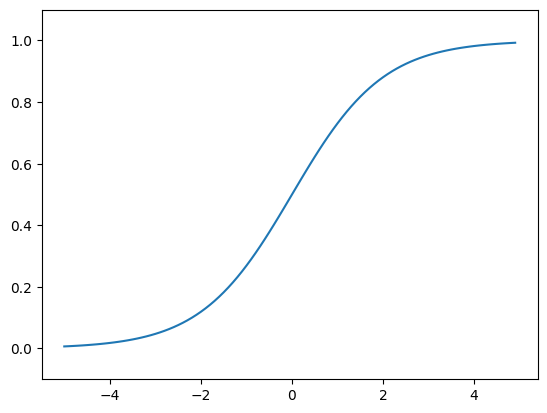

In [17]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # 指定y轴的范围
plt.show()

### ReLU函数

In [18]:
def relu(x):
    return np.maximum(0, x)

## 多维数组的运算

In [20]:
import numpy as np
A = np.array([1, 2, 3, 4])
print(A)

[1 2 3 4]


In [21]:
np.ndim(A)

1

In [22]:
A.shape

(4,)

In [23]:
A.shape[0]

4

In [27]:
B = np.array([[1,2], [3,4], [5,6]])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [28]:
np.ndim(B)

2

In [26]:
B.shape

(3, 2)

### 矩阵乘法

In [29]:
# 2 × 2 矩 阵

A = np.array([[1,2], [3,4]])
print(A.shape)

B = np.array([[5,6], [7,8]])
print(B.shape)

np.dot(A, B)

(2, 2)
(2, 2)


array([[19, 22],
       [43, 50]])

In [30]:
# 2 × 3的矩阵和 3 × 2 的矩阵的乘积

A = np.array([[1,2,3], [4,5,6]])
print(A.shape)

B = np.array([[1,2], [3,4], [5,6]])
print(B.shape)

np.dot(A, B)

(2, 3)
(3, 2)


array([[22, 28],
       [49, 64]])

In [31]:
# 当A是二维矩阵、B是一维数组时，对应维度的元素个数要保持一致的原则依然成立。

A = np.array([[1,2], [3, 4], [5,6]])
print(A.shape)

B = np.array([7,8])
print(B.shape)

np.dot(A, B)

(3, 2)
(2,)


array([23, 53, 83])

### 神经网络的内积

In [32]:
X = np.array([1, 2])
print(X.shape)

W = np.array([[1, 3, 5], [2, 4, 6]])
print(W)
print(W.shape)

Y = np.dot(X, W)
print(Y)

(2,)
[[1 3 5]
 [2 4 6]]
(2, 3)
[ 5 11 17]


## 3层神经网络的实现

In [35]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])
print(W1.shape) # (2, 3)
print(X.shape) # (2,)
print(B1.shape) # (3,)
A1 = np.dot(X, W1) + B1
print(A1.shape)
print(A1)

Z1 = sigmoid(A1)
print(Z1)

(2, 3)
(2,)
(3,)
(3,)
[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [36]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])
print(Z1.shape) # (3,)
print(W2.shape) # (3, 2)
print(B2.shape) # (2,)
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
print(Z2.shape)
print(Z2)

(3,)
(3, 2)
(2,)
(2,)
[0.62624937 0.7710107 ]


In [37]:
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])
A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3) # 或者Y = A3

print(Y.shape)
print(Y)

(2,)
[0.31682708 0.69627909]


### 神经网络代码实现小结

In [38]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y) # [ 0.31682708 0.69627909]

[0.31682708 0.69627909]


## 输出层的设计

### 恒等函数和 softmax函数

In [39]:
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a) # 指数函数
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [40]:
sum_exp_a = np.sum(exp_a) # 指数函数的和
print(sum_exp_a)

74.1221542101633


In [41]:
y = exp_a / sum_exp_a
y

array([0.01821127, 0.24519181, 0.73659691])

In [42]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y


### 实现 softmax 函数时的注意事项

In [43]:
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a)) # softmax函数的运算

/var/folders/8n/hzxsnm0d1_lccvd_23y05p4r0000gn/T/ipykernel_23500/2687910328.py:2: RuntimeWarning: overflow encountered in exp
  np.exp(a) / np.sum(np.exp(a)) # softmax函数的运算
/var/folders/8n/hzxsnm0d1_lccvd_23y05p4r0000gn/T/ipykernel_23500/2687910328.py:2: RuntimeWarning: invalid value encountered in divide
  np.exp(a) / np.sum(np.exp(a)) # softmax函数的运算


array([nan, nan, nan])

In [44]:
c = np.max(a) # 1010
a - c
np.exp(a - c) / np.sum(np.exp(a - c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [46]:
# 防止溢出
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # 溢出对策
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

### softmax函数的特征

In [47]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)

[0.01821127 0.24519181 0.73659691]


In [48]:
np.sum(y)

1.0

## 手写数字识别

In [2]:
import sys, os
sys.path.append(os.pardir) # 为了导入父目录中的文件而进行的设定
from dataset.mnist import load_mnist

# 第一次调用会花费几分钟 ……
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

# 输出各个数据的形状
print(x_train.shape) # (60000, 784)
print(t_train.shape) # (60000,)
print(x_test.shape) # (10000, 784)
print(t_test.shape) # (10000,)

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [5]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)
img = x_train[0]
label = t_train[0]

print(label) # 5
print(img.shape) # (784,)

img = img.reshape(28, 28) # 把图像的形状变成原来的尺寸
print(img.shape) # (28, 28)
img_show(img)

5
(784,)
(28, 28)


### 神经网络的推理处理

In [12]:
import pickle

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # 溢出对策
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    return y

In [13]:
x, t = get_data()
network = init_network()
accuracy_cnt = 0

for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y) # 获取概率最高的元素的索引
    if p == t[i]:
        accuracy_cnt += 1
        
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


### 批处理

In [14]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']
print(f"{W1}\n{W2}\n{W3}")

[[-0.00741249 -0.00790439 -0.01307499 ...  0.01978721 -0.04331266
  -0.01350104]
 [-0.01029745 -0.01616653 -0.01228376 ...  0.01920228  0.02809811
   0.01450908]
 [-0.01309184 -0.00244747 -0.0177224  ...  0.00944778  0.01387301
   0.03393568]
 ...
 [ 0.02242565 -0.0296145  -0.06326169 ... -0.01012643  0.01120969
   0.01027199]
 [-0.00761533  0.02028973 -0.01498873 ...  0.02735376 -0.01229855
   0.02407041]
 [ 0.00027915 -0.06848375  0.00911191 ... -0.03183098  0.00743086
  -0.04021148]]
[[-0.10694039  0.01591247 -0.44349867 ...  0.03561032  0.14045963
   0.03964241]
 [ 0.29911557 -0.03322235 -0.08902215 ... -0.04722451 -0.0972147
   0.2950258 ]
 [ 0.06576645  0.6330455   0.02325344 ...  0.05046809  0.26831996
  -0.13252524]
 ...
 [-0.1839421  -0.10925075  0.25180233 ...  0.06017017  0.11689074
   0.28868544]
 [ 0.10001627  0.0899286  -0.03874066 ...  0.15217757 -0.05744234
  -0.00713823]
 [-0.02220659 -0.05105179  0.00777963 ... -0.531206   -0.4042084
   0.0090801 ]]
[[-4.21735764e-01 

In [15]:
x.shape

(10000, 784)

In [16]:
x[0].shape

(784,)

In [17]:
W1.shape

(784, 50)

In [18]:
W2.shape

(50, 100)

In [19]:
W3.shape

(100, 10)

In [20]:
x, t = get_data()
network = init_network()
batch_size = 100 # 批数量
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


# 第4章 神经网络的学习

## 损失函数

### 均方误差

In [3]:
import numpy as np
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [4]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
mean_squared_error(np.array(y), np.array(t))

0.09750000000000003

In [5]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))

0.5975

### 交叉熵误差

In [6]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [7]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [8]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

### mini-batch学习

In [9]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
print(x_train.shape) # (60000, 784)
print(t_train.shape) # (60000, 10)

(60000, 784)
(60000, 10)


In [10]:
np.random.choice(6000, 10)

array([ 274, 1660, 3733, 3157, 2343,  935, 2215,  674, 2730, 1417])

In [11]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]
print(x_batch)
print(t_batch)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


### mini-batch版交叉熵误差的实现

In [12]:
# one-hot

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [ ]:
# not one-hot

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

# np.arange (batch_size)会生成一个从 0 到 batch_size-1 的数组。比如当 batch_size 为 5 时，
# np.arange(batch_size) 会生成一个NumPy 数组[0, 1, 2, 3, 4]。
# 因为 t 中标签是以 [2, 7, 0, 9, 4] 的形式存储的，所以 y[np.arange(batch_size), t]
# 能抽出各个数据的正确解标签对应的神经网络的输出
# 在这个例子中，y[np.arange(batch_size), t] 会生成 NumPy 数组 [y[0,2], y[1,7], y[2,0], y[3,9], y[4,4]]


## 数值微分

### 导数

In [13]:
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

### 数值微分的例子

In [14]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

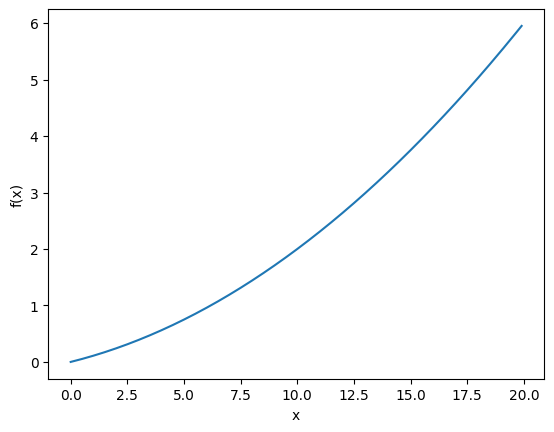

In [15]:
import numpy as np
import matplotlib.pylab as plt
x = np.arange(0.0, 20.0, 0.1) # 以0.1为单位，从0到20的数组x
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [16]:
numerical_diff(function_1, 5)

0.1999999999990898

In [17]:
numerical_diff(function_1, 10)

0.2999999999986347

### 偏导数

In [18]:
def function_2(x):
    return x[0]**2 + x[1]**2
    # 或者return np.sum(x**2)

In [20]:
# 问题1：求x0 = 3, x1 = 4时，关于x0的偏导数

def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [21]:
# 问题2：求x0 = 3, x1 = 4时，关于x1的偏导数

def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119

## 梯度

在刚才的例子中，我们按变量分别计算了 x0 和 x1 的偏导数。现在，我们希望一起计算x0和x1的偏导数。
像这样的由全部变量的偏导数汇总而成的向量称为梯度（gradient）。

In [22]:
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # 生成和x形状相同的数组

    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h)的计算
        x[idx] = tmp_val + h
        fxh1 = f(x)

        # f(x-h)的计算
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 还原值
    return grad

函数 numerical_gradient(f, x) 中，参数 f 为函数，x 为 NumPy 数组，该函数对 NumPy 数组x的各个元素求数值微分。
现在，我们用这个函数实际计算一下梯度。这里我们求点 (3, 4)、(0, 2)、(3, 0) 处的梯度。

In [23]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [24]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [25]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

### 梯度法

In [26]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x

# 学习率 lr 过大或者过小都无法得到好的结果

In [28]:
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

### 神经网络的梯度

In [30]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 用高斯分布进行初始化

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        return loss

In [31]:
net = simpleNet()
print(net.W) # 权重参数

[[-1.33055184 -0.16074859  0.7428918 ]
 [-0.35812586 -0.85218893  0.09633387]]


In [32]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)


[-1.12064437 -0.86341919  0.53243557]


In [33]:
np.argmax(p)

2

In [34]:
t = np.array([0, 0, 1]) # 正确解标签
net.loss(x, t)

0.36400429863279593

In [35]:
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.07982567  0.10324144 -0.18306711]
 [ 0.1197385   0.15486216 -0.27460066]]


In [37]:
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)
dW

array([[ 0.07982567,  0.10324144, -0.18306711],
       [ 0.1197385 ,  0.15486216, -0.27460066]])

## 学习算法的实现

**前提**

神经网络存在合适的权重和偏置，调整权重和偏置以便拟合训练数据的过程称为“学习”。神经网络的学习分成下面4个步骤。


**步骤 1（mini-batch）**

从训练数据中随机选出一部分数据，这部分数据称为mini-batch。我们的目标是减小mini-batch的损失函数的值。

**步骤 2（计算梯度）**

为了减小mini-batch的损失函数的值，需要求出各个权重参数的梯度。梯度表示损失函数的值减小最多的方向。

**步骤3（更新参数）**

将权重参数沿梯度方向进行微小更新。

**步骤4（重复）**

重复步骤1、步骤2、步骤3。


*这里使用的数据是随机选择的 mini batch 数据，所以又称为随机梯度下降法（stochastic gradient descent）。*

### 2层神经网络的类

In [45]:
import sys, os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):

        # 初始化权重
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y

    # x:输入数据, t:监督数据
    def loss(self, x, t):
        y = self.predict(x)

        return cross_entropy_error(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # x:输入数据, t:监督数据
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

In [40]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape) # (784, 100)
print(net.params['b1'].shape) # (100,)
print(net.params['W2'].shape) # (100, 10)
print(net.params['b2'].shape) # (10,)


(784, 100)
(100,)
(100, 10)
(10,)


In [42]:
x = np.random.rand(100, 784) # 伪输入数据（100笔）
y = net.predict(x)
y

array([[0.10352637, 0.09692223, 0.099531  , 0.10202541, 0.09890069,
        0.10624322, 0.10182988, 0.10107655, 0.0950225 , 0.09492214],
       [0.10370412, 0.09738011, 0.09903809, 0.10213604, 0.09870513,
        0.1062154 , 0.10144311, 0.10136804, 0.09505469, 0.09495526],
       [0.10387259, 0.09736258, 0.09933855, 0.10172442, 0.09847783,
        0.10668332, 0.10166311, 0.10120905, 0.09483632, 0.09483223],
       [0.10401539, 0.09730519, 0.09962813, 0.10232687, 0.09839833,
        0.1064406 , 0.10129282, 0.10114496, 0.09454774, 0.09489998],
       [0.10430889, 0.09726194, 0.09933625, 0.10193234, 0.09872108,
        0.10679959, 0.10130765, 0.100627  , 0.09473894, 0.09496632],
       [0.10358928, 0.09735884, 0.09977285, 0.10197333, 0.0984367 ,
        0.10661938, 0.10148189, 0.10092644, 0.09476233, 0.09507896],
       [0.1041181 , 0.0974545 , 0.09952312, 0.10187185, 0.09875611,
        0.10614097, 0.10163813, 0.10107798, 0.09477174, 0.0946475 ],
       [0.1039055 , 0.09733551, 0.0991718

In [43]:
x = np.random.rand(100, 784) # 伪输入数据（100笔）
t = np.random.rand(100, 10) # 伪正确解标签（100笔）
grads = net.numerical_gradient(x, t) # 计算梯度
print(grads['W1'].shape) # (784, 100)
print(grads['b1'].shape) # (100,)
print(grads['W2'].shape) # (100, 10)
print(grads['b2'].shape) # (10,)

(784, 100)
(100,)
(100, 10)
(10,)


### mini-batch的实现

In [1]:
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label = True)
train_loss_list = []

# 超参数
iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    # 获取mini-batch
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 计算梯度
    grad = network.numerical_gradient(x_batch, t_batch)
    # grad = network.gradient(x_batch, t_batch) # 高速版!

    # 更新参数
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 记录学习过程
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

In [3]:
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label = True)
train_loss_list = []
train_acc_list = []
test_acc_list = []

# 超参数
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

# 平均每个epoch的重复次数
iter_per_epoch = max(train_size / batch_size, 1)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    # 获取mini-batch
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 计算梯度
    grad = network.numerical_gradient(x_batch, t_batch)
    # grad = network.gradient(x_batch, t_batch) # 高速版!

    # 更新参数
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        loss = network.loss(x_batch, t_batch)
        train_loss_list.append(loss)

        # 计算每个epoch的识别精度
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            test_acc = network.accuracy(x_test, t_test)
            train_acc_list.append(train_acc)
            test_acc_list.append(test_acc)
            print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

train acc, test acc | 0.09875, 0.098
train acc, test acc | 0.09875, 0.098
train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.11236666666666667, 0.1135
